# Métodos para sistemas no lineales

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def newtonMultivariate(F, J, x_0, n, tol=1e-10):
    x = np.zeros((n + 1, x_0.shape[0]))
    x[0] = x_0
    for k in range(n):
        w = np.linalg.solve(J(*x[k]), -F(*x[k]))
        x[k+1] = x[k] + w
        if np.linalg.norm(F(*x[k+1])) < tol:
            x = x[:k+2]
            break
    return x

In [3]:
def broyden1(F, A_0, x_0, n, tol=1e-10):
    x = np.zeros((n + 1, x_0.shape[0]))
    x[0] = x_0
    A_k = A_0
    for k in range(n):
        delta = np.linalg.solve(A_k, -F(*x[k]))
        x[k+1] = x[k] + delta
        Delta = F(*x[k+1]) - F(*x[k])
        A_k = A_k + np.outer(Delta - np.dot(A_k, delta), delta) / np.dot(delta, delta)
        if np.linalg.norm(F(*x[k+1])) < tol:
            x = x[:k+2]
            break
    return x

In [4]:
def broyden2(F, B_0, x_0, n, tol=1e-10):
    x = np.zeros((n + 1, x_0.shape[0]))
    x[0] = x_0
    B_k = B_0
    for k in range(n):
        x[k+1] = x[k] - np.dot(B_k, F(*x[k]))
        delta = x[k+1] - x[k]
        Delta = F(*x[k+1]) - F(*x[k])
        B_k = B_k + np.dot(np.outer(delta - np.dot(B_k, Delta), delta), B_k) / np.dot(delta, np.dot(B_k, Delta))
        if np.linalg.norm(F(*x[k+1])) < tol:
            x = x[:k+2]
            break
    return x

In [5]:
def error(X, x):
    err = np.linalg.norm(X - x, axis=1, ord=np.inf) / np.linalg.norm(x, np.inf) 
    return err

In [6]:
def plotCompare(error_n, error_b1, error_b2):
    iter_n = np.arange(error_n.shape[0])
    iter_b1 = np.arange(error_b1.shape[0])
    iter_b2 = np.arange(error_b2.shape[0])
    plt.figure(figsize=(12, 6))
    plt.plot(iter_n, error_n, 'go',label="Newton")
    plt.plot(iter_b1, error_b1, 'rs', label="Broyden 1")
    plt.plot(iter_b2, error_b2, 'kd', label="Broyden 2")
    plt.xlabel("# Iteraciones")
    plt.ylabel("Error")
    plt.yscale('log')
    plt.grid(True)
    plt.legend()
    plt.show()

## Ejemplo de sistema de ecuaciones no lineales

Resolver 
\begin{equation}
    \begin{split}
        y - x^3 & = 0 \\
        x^2 + y^2 - 1 & = 0
    \end{split}
\end{equation}

Se define $f_1(x,y)=y - x^3$, $f_2(x,y)=x^2 + y^2 - 1$,
\begin{equation}
    \mathbf{F}(x,y)=
    \begin{bmatrix}
        f_1(x,y) \\ f_2(x,y)
    \end{bmatrix} = 
    \begin{bmatrix}
        y - x^3 \\
        x^2 + y^2 - 1
    \end{bmatrix},
\end{equation}

y 
\begin{equation}
    J_{\mathbf{F}}(x,y)=
    \begin{bmatrix}
        -3x^2 & 1 \\
        2x & 2y
    \end{bmatrix}
\end{equation}

La solución real de este sistema es: $x=\pm 0.826031357654187$, $y=\pm 0.826031357654187^3$.

In [7]:
F1 = lambda x, y: np.array([y - x ** 3, x ** 2 + y ** 2 - 1])
J1 = lambda x, y: np.array([[-3 * x ** 2, 1], [2 * x, 2 * y]])
x1_0 = np.array([1, 2])
x_sol = np.array([0.826031357654187, 0.826031357654187**3])

In [8]:
n1_n = 7
x1_n = newtonMultivariate(F1, J1, x1_0, n1_n)

In [9]:
A_0 = np.eye(x1_0.shape[0]) # J1(*x1_0)
n1_b = 50
x1_b1 = broyden1(F1, A_0, x1_0, n1_b)

In [10]:
B_0 = np.eye(x1_0.shape[0]) # np.linalg.inv(J1(*x1_0))
n1_b2 = 50
x1_b2 = broyden2(F1, B_0, x1_0, n1_b2)

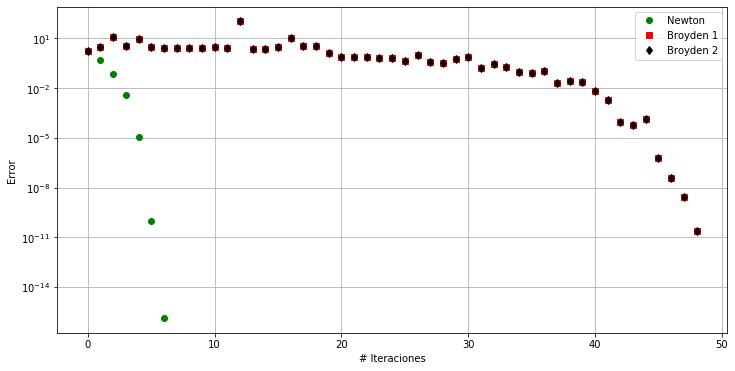

In [11]:
error_n = error(x1_n, x_sol) 
error_b1 = error(x1_b1, x_sol) 
error_b2 = error(x1_b2, x_sol)
plotCompare(error_n, error_b1, error_b2)

## Ejemplo sistema de ecuaciones lineales

Resolver 

\begin{equation}
    \begin{split}
        x - 8y - 2z & = 1 \\
        x + y + 5z & = 4 \\
        3x - y + z & = -2 
    \end{split}
\end{equation}

Debemos llevarlo a la forma $\mathbf{F}(\mathbf{x})=\mathbf{0}$, con $\mathbf{x}=(x,y,z)$.

\begin{equation}
    \mathbf{F}(x,y,z)=
    \begin{bmatrix}
        x - 8y - 2z - 1 \\
        x + y + 5z - 4 \\
        3x - y + z +2 
    \end{bmatrix},
\end{equation}

y,

\begin{equation}
    J_{\mathbf{F}}(x,y,z) = 
    \begin{bmatrix}
        1 & -8 & -2 \\
        1 & 1 & 5 \\
        3 & -1 & 1
    \end{bmatrix}
\end{equation}

In [12]:
F2 = lambda x, y, z: np.array([x - 8 * y - 2 * z - 1, x + y + 5 * z - 4, 3 * x - y + z + 2])
J2 = lambda x, y, z: np.array([[1, -8, -2], [1, 1, 5], [3, -1, 1]])
x2_0 = np.array([1, 3, 0])

### Solución 

In [13]:
A = np.array([
    [1, -8, -2],
    [1, 1, 5],
    [3, -1, 1]
]) # Se parece a otra matriz?
b = np.array([1, 4, -2])
x_2 = np.linalg.solve(A, b)

In [14]:
x_2

array([-1.24489796, -0.57142857,  1.16326531])

### Aproximación con Newton

In [15]:
n2_n = 10
x2_n = newtonMultivariate(F2, J2, x2_0, n2_n)

In [16]:
x2_n

array([[ 1.        ,  3.        ,  0.        ],
       [-1.24489796, -0.57142857,  1.16326531]])

In [17]:
np.linalg.norm(x2_n[-1] - x_2, np.inf)

2.220446049250313e-16

Notar que al tener un sistema de ecuaciones lineales y utilizar Newton en $\mathbb{R}^n$ ocurre lo siguiente.

\begin{equation}
    \mathbf{F}(\mathbf{x})= 
    \begin{bmatrix}
        a_{1,1}x_1 + a_{1, 2}x_2 + \cdots a_{1, n}x_n - b_1 \\
        a_{2,1}x_1 + a_{2, 2}x_2 + \cdots a_{2, n}x_n - b_2 \\
        \quad \vdots \\
        a_{n,1}x_1 + a_{n, 2}x_2 + \cdots a_{n, n}x_n - b_n \\
    \end{bmatrix} = 
    A\mathbf{x}-\mathbf{b}
\end{equation}

y al calcular la matriz Jacobiana tenemos:

\begin{equation}
    J_{\mathbf{F}}(\mathbf{x}) = 
    \begin{bmatrix}
        a_{1,1} & a_{1, 2} & \cdots & a_{1, n} \\
        \vdots  & \vdots   & \vdots & \vdots \\ 
        a_{n,1} & a_{n, 2} & \cdots & a_{n, n} 
    \end{bmatrix} = 
    A.
\end{equation}

Al aplicar el algoritmo tenemos:

\begin{equation}
    \begin{split}
        J_{\mathbf{F}}(\mathbf{x}_k)\, \mathbf{w} &= -\mathbf{F}(\mathbf{x}_k) \\
        A\,(\mathbf{x}_{k+1}-\mathbf{x}_{k}) & = \mathbf{b} - A\mathbf{x}_k \\
        A\,\mathbf{x}_{k+1}-A\,\mathbf{x}_{k} & = \mathbf{b} - A\mathbf{x}_k \\
        A\,\mathbf{x}_{k+1} & = \mathbf{b}
    \end{split},
\end{equation}

es decir, se resuelve el mismo sistema de ecuaciones lineales del cual estamos buscando solución en un paso.